# Multivariate Visualizations

<a id="0"></a>
Table of Contents
- [Non-Positional Encodings for Third Variables](#1)
  - [Encoding via shape](#1.1)
  - [Encoding via size](#1.2)
  - [A Warning on Combining Encodings](#1.3)
- [Color Palette](#2)
  - [Encoding via Color](#2.1)
  - [Color Palettes](#2.2)
  - [Selecting Color Palettes](#2.3)
  - [Warnings on Color](#2.4)
- [Faceting in Two Directions](#3)
- [Other Adaptations of Bivariate Plots](#4)
- [Plot Matrices](#5)
  - [Plot Matrices](#5.1)
  - [Correlation Matrices](#5.2)
- [Feature Engineering](#6)

<a id="1"></a>
## Non-Positional Encodings for Third Variables
[Table of contents](#0)

There are four major cases to consider when we want to plot three variables together:

- three numeric variables
- two numeric variables and one categorical variable
- one numeric variable and two categorical variables
- three categorical variables

If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. 

You will see additional techniques later that can also be applied to the other two cases, i.e. where we have at least two categorical variables.

Three main non-positional encodings stand out: **shape**, **size**, and **color**. 

Shape is often used to encode qualitative variables, and size is often used for numeric variables. When using size, it is important to pay attention to the mapping between the variable's value to the size (area) of each point, thus there is no distoring effect due to disproportional representation. 

Sometimes, different functions might need to be used so that all points remain readable, similar to how you might perform an access transformation.

For Matplotlib and Seaborn, color is the most common and easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next.

<a id="1.1"></a>
### Encoding via shape
[Table of content](#0)

Shape is a good encoding for categorical variables, especially good choice for nominal type of data, using one shape for each level of the categorical variable. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


In [3]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 
                 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [4]:
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


In [5]:
# use just subset of data to reduce over-plotting
np.random.seed(2021)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]
fuel_econ_subset

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
872,33923,Subaru,Impreza AWD,2014,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.5,...,96,16.7674,20.8845,22.5537,31.4599,18.9559,468,4,4,Manual
1663,35337,Hyundai,Veloster,2015,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,90,25.9773,33.7198,34.1136,49.5544,29.1006,301,7,7,Manual
2428,36881,Ford,Mustang,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,...,0,18.7011,23.4925,27.3436,38.7800,21.8020,410,5,5,Automatic
1180,34466,Porsche,911 Targa 4,2014,Minicompact Cars,4-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.4,...,0,18.3385,23.0000,25.8687,36.5000,21.1028,422,5,5,Manual
853,33852,Cadillac,XTS AWD,2014,Large Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,104,15.9536,19.8000,23.7068,33.2000,18.7067,475,4,4,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,37896,BMW,430i Gran Coupe,2017,Compact Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,4,2.0,...,92,23.4350,30.0698,34.1627,49.6345,27.2915,324,6,6,Automatic
2979,38014,BMW,340i,2017,Compact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,6,3.0,...,96,19.0649,23.9882,29.2962,41.8348,22.6198,395,5,5,Manual
1015,34160,Chrysler,200 Convertible,2014,Compact Cars,Front-Wheel Drive,Automatic 6-spd,Regular Gasoline,4,2.4,...,0,18.1909,22.8000,28.7015,40.9000,21.7801,407,5,5,Automatic
3786,39502,Nissan,Altima SR,2018,Midsize Cars,Front-Wheel Drive,Automatic (AV-S7),Regular Gasoline,4,2.5,...,102,26.0000,35.1000,37.0000,53.5000,30.0000,296,7,7,Automatic


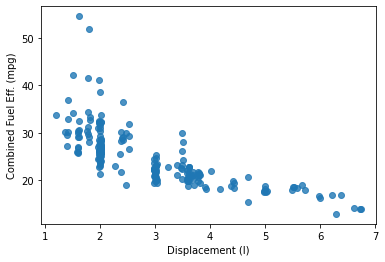

In [6]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb',
           x_jitter=0.03, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

We have seen this plot previously. What if we want to know the differences between cars with automatic transmission and manual transmission in terms of fuel efficiency and engine size? Since transmission type is categorical, shape is a good encoding to use.

We can use _"marker"_ for this purpose. However, the _"marker"_ can take a single string and there is no built-in way to automatically assign different shapes in a single call of the `scatter` or `regplot` function. That means we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different _"marker"_ argument value for each one.

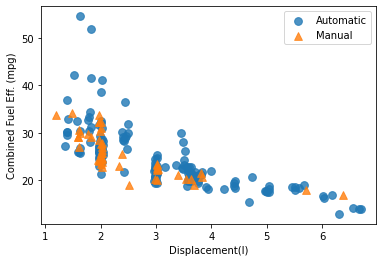

In [7]:
# Set up a list of a list, with my mapping of levels to symbol types
# rather than setting up a dictionary 
# so that I can have finer control of the order in which the levels are plotted
ttype_markers = [['Automatic', 'o'], 
                 ['Manual'   , '^']]

# loop over the list element
for ttype, marker in ttype_markers:
    
    # use ttype to select only the plots with matching transmission type
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    
    # use the marker in the regplot function
    sb.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04,
               fit_reg=False, marker=marker, scatter_kws={'s': 60})    # 's': size

plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']); # given a list of labels, one for each regplot call

The 'o' string specifies circular markers for members of category 'Automatic', while the '^' string specifies triangle markers for members of category 'Manual'. The `legend` function adds a `legend` to the plot, with one marker for each `regplot` call made. The function argument sets the labels for those points.

Note that the two categories have automatically been double-encoded with different colors, in addition to the explicitly specified markers. If we wanted the points to have the same color as well, we could do that through the `"c"` parameter in scatter or `"color"` in `regplot`. A small example of where this is useful will be seen in the next section.

<a id="1.2"></a>
### Encoding via size
[Table of contents](#0)

Point size is a good encoding for numeric variables. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the `"s"` parameter in `scatter`. (You need to refer to `"s"` through a dictionary assigned to the `"scatter_kws"` parameter when working with `regplot`.)

While the creation of the plot is easier with size, we need to put in extra leg work to create a `legend`. Since, as noted above, `legend` will only create one legend entry per plot function call, we need to create additional <u>dummy scatter objects</u> with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and three arguments are provided to the `legend` function: the list of plotting objects to depict in the legend, their labels, and the title of the legends.

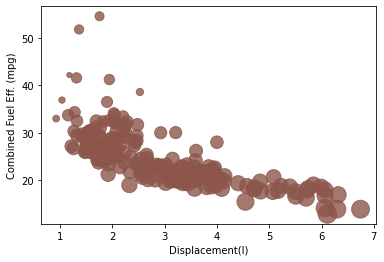

In [9]:
base_color = sb.color_palette()[5]

# use scatter_kws param, and but need to explicitly assign it 
# the full Series rather than the column name
# and also need to reduce the marker size 
sb.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.54, color=base_color,
           fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/2}) # 's': marker size   

plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Looks like when engine size increases, there is a higher level of co2 emissions. It also seems that the less fuel efficient cars also tend to have higher emissions, even at similar engine sizes.

We have a small problem here when it comes to adding a legend. We only have one scatter plot Series plotted, so the legend will only give us a single dot. As a work around, we can add dummy scatter plot sequences so that we can construct our legend.

When we use plotting functions in Matplotlib and Seaborn, we actually get plotting objects back. We haven't been storing them so far since we've not needed them, but this is one case we want them. 

Let's set up a loop through 3 CO2 values that we want to use for the size legend reference. Inside the loop, use the `scatter` function to create scatter plot objects, setting the necessary point sizes. The first two arguments for x and y positions are empty lists so no points are actually plotted. I'am also adding a color argument so that all of our new series share a consistent color. Finally, I'm going to set up a list `legend_obj` to store all of our dummy scatter plot objects. 

In the `legend` function, if there is only one argument, then it is assumed to be the labels for the plot objects. With two arguments, the first one is a list of objects to be depicted in the legend, and the second one is a list of labels. The "title" parameter is useful to give the units of the legend values since it is based on numeric values.

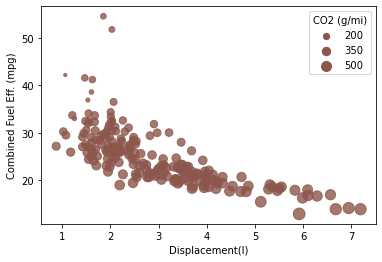

In [10]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.54, color=base_color,
           fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/5}) # 's': marker size   

plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# create dummy scatter objects
sizes= [200, 350, 500]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[], s=s/5, color=base_color))
plt.legend(legend_obj, sizes, title='CO2 (g/mi)');

In the case of the example, the data was also scaled in a way that the marker sizes made sense as given. You might need to apply a scaling factor (e.g., multiplying or dividing all values by 5 as shown) or shift in order to make the size encoding interpretable. In particular, if the values in your third numeric variable include negative values, then you might want to choose a color encoding instead.

<a id="1.3"></a>
### A Warning on Combining Encodings
[Table of contents](#0)

It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once. Technically, this may be true, but there are some cautions to be taken with this approach. One surface issue is that the code to depict the plot and a reasonable legend gets complicated. A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:

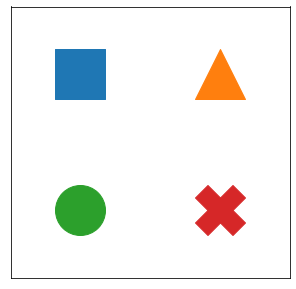

In [47]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker='s', s=common_size)
plt.scatter([1],[1], marker='^', s=common_size)
plt.scatter([0],[0], marker='o', s=common_size)
plt.scatter([1],[0], marker='X', s=common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5, 1.5)
plt.xticks([])
plt.ylim(-0.5, 1.5)
plt.yticks([]);

Despite having the same "s" values, the triangle, circle, and X markers all look smaller (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider. 

<a id="2"></a>
## Color Palettes
[Table of contents](#0)

<a id="2.1"></a>
### Encoding via Color
[Table of contents](#0)

Color is a very common encoding for variables, for both qualitative and quantitative variables. You've already seen this employed in previous lessons where position could not be used to encode a value: color for category in a clustered bar chart, and color for count in a heat map (both as a 2-d histogram and as a 2-d bar chart). Here, we'll look at how to employ color in scatterplots, as well as discuss more about color palette choices depending on the type of data you have.

There are three major palette types:
- Qualitative: 
>It is geard toward nominal data consists of distinct hues with fairly similar brightness and saturation. This way, no ordering is implied, and individual levels aren't implied as more important than others.
- Sequential: 
> It should be used for orginal and numeric data. In a good sequetial palette, low values are indicated by lighter, less saturated colors, while high values are indicated by darker, more saturated colors. Sometimes, this is flipped the other way around: light for high, and dark for low. Usually, a single or small range of hues is used. 
- Divergent
>For certain ordinal or numeric data that have a meaningful center point. A divigent palette is essentially two sequential palettes with distinct hues put back to back, with the connecting color at the center point. One hue will indicate values greater than the center point, and the other hue values smaller than the center point.

There are a couple of things that you should check even after selecting a palette, regardless of type. 
1. First of all, be mindful of hue choice and account for color blindness, especially in qualitative and diverging scales. If you want to use opposing color like red and green in the same plot, try to make sure that they can be distinguished by those with color perception deficiencies, especially when the red and green are too close in brightness and saturation.
2. Secondly, try and avoid transparency on top of color. If points of different color overlap, this can create uninterpretable new colors. If points of the same color but different saturation overlap, this can create an altogether new and incorrect value to be perceived.

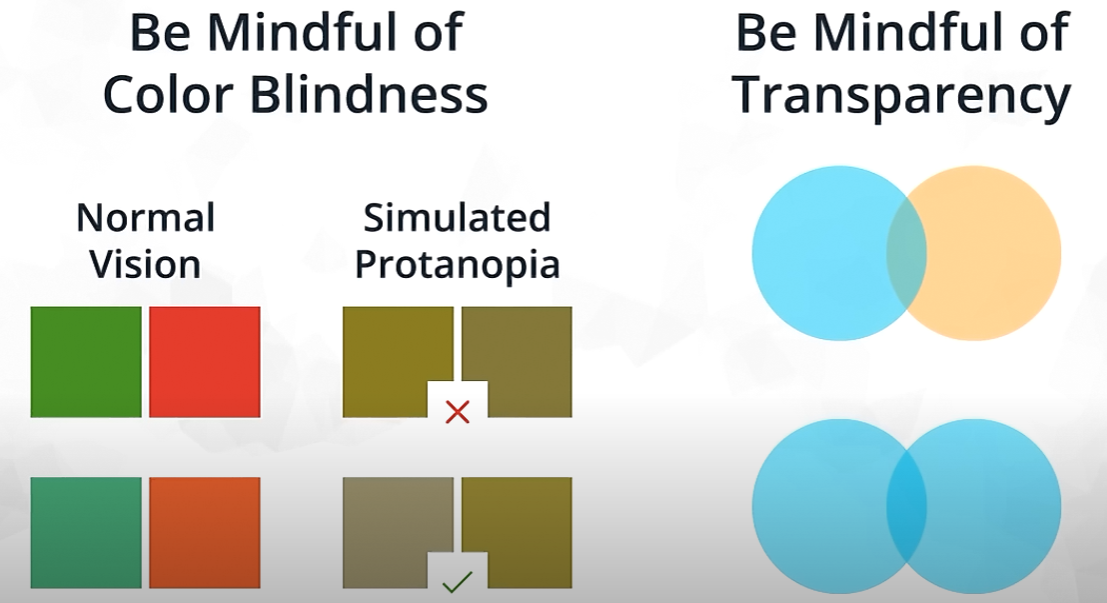


If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the `"hue"` parameter on seaborn's `FacetGrid` class.

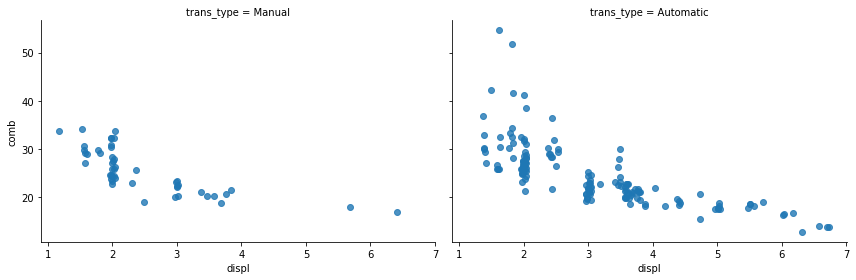

In [18]:
# Before, we faceted plots by "col" parameter on qualitatitive variables 
g = sb.FacetGrid(data=fuel_econ_subset, col='trans_type', height=4, aspect=1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);

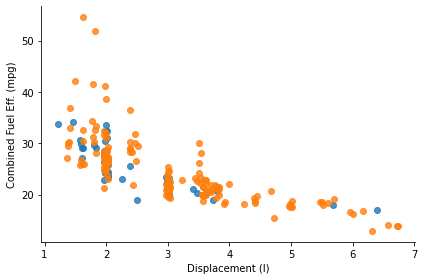

In [57]:
# Now, we plot it based on a nominal variable "trans_type" using the "hue" parameter
# And now we have distinct represented color in the same plot
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type', height=4, aspect=1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

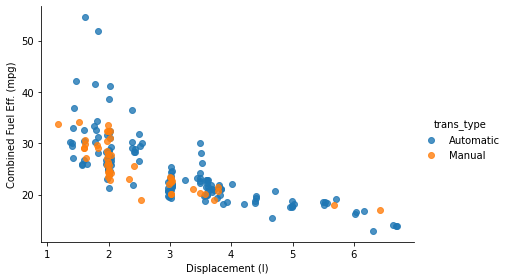

In [58]:
# For the manual transmission points plotted on top of automatic, 
# we can use hue_order parameter to do that.
# this is not just plain order since FacetGrid can also 
# take orderings on other facet dimensions.
g = sb.FacetGrid(data=fuel_econ_subset, 
                 hue='trans_type', 
                 height=4, 
                 aspect=1.5,
                 hue_order=['Automatic', 'Manual'])
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend();  # automatically add a legend to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

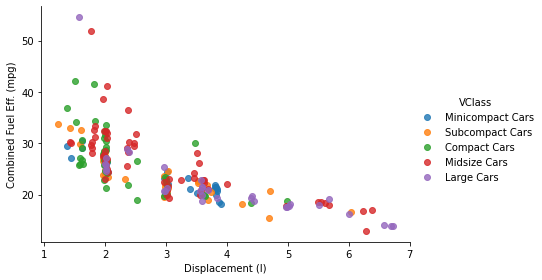

In [60]:
# if we do the plotting based on an ordinal variable "VClass" in this case, 
# the qualitative palette doesn't work quite as well as nominal variables
# we should specify a sequential palette instead

g = sb.FacetGrid(data=fuel_econ_subset, hue='VClass', height=4, aspect=1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend();  # automatically add a legend to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

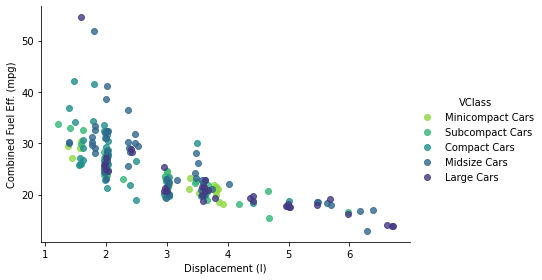

In [61]:
# specify a sequential palette instead using "palette='viridis_r'" parameter
# This palette not only goes from light to dark,
# but also has a good range of hues to further discriminate the categorical variables.
g = sb.FacetGrid(data=fuel_econ_subset, 
                 hue='VClass', 
                 height=4, 
                 aspect=1.5,
                 palette='viridis_r')

g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend();  # automatically add a legend to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

What if we have a numeric variable instead, like CO2 emissions?

We should not just set the variable in the hue parameter since `FacetGrid` expects any variable input for subsetting to be categorical. If we that, we will get a series of colors for every unique CO2 values in a rank ordered color scheme. 

Instead, we should just use the basic Matplotlib `scatter` function to create our plot. we can set color based on numeric value in the `scatter` function through the `"c"` parameter, much like how we set up marker sizes through `"s"`. We lose convenient jitter in this case, but there is an interaction in the color parameters in regplot that make coloring by value hard to do. (Unlike with size, we don't have an easy way of setting color by numeric value through `regplot` due to how its `"color"` argument is set up.)

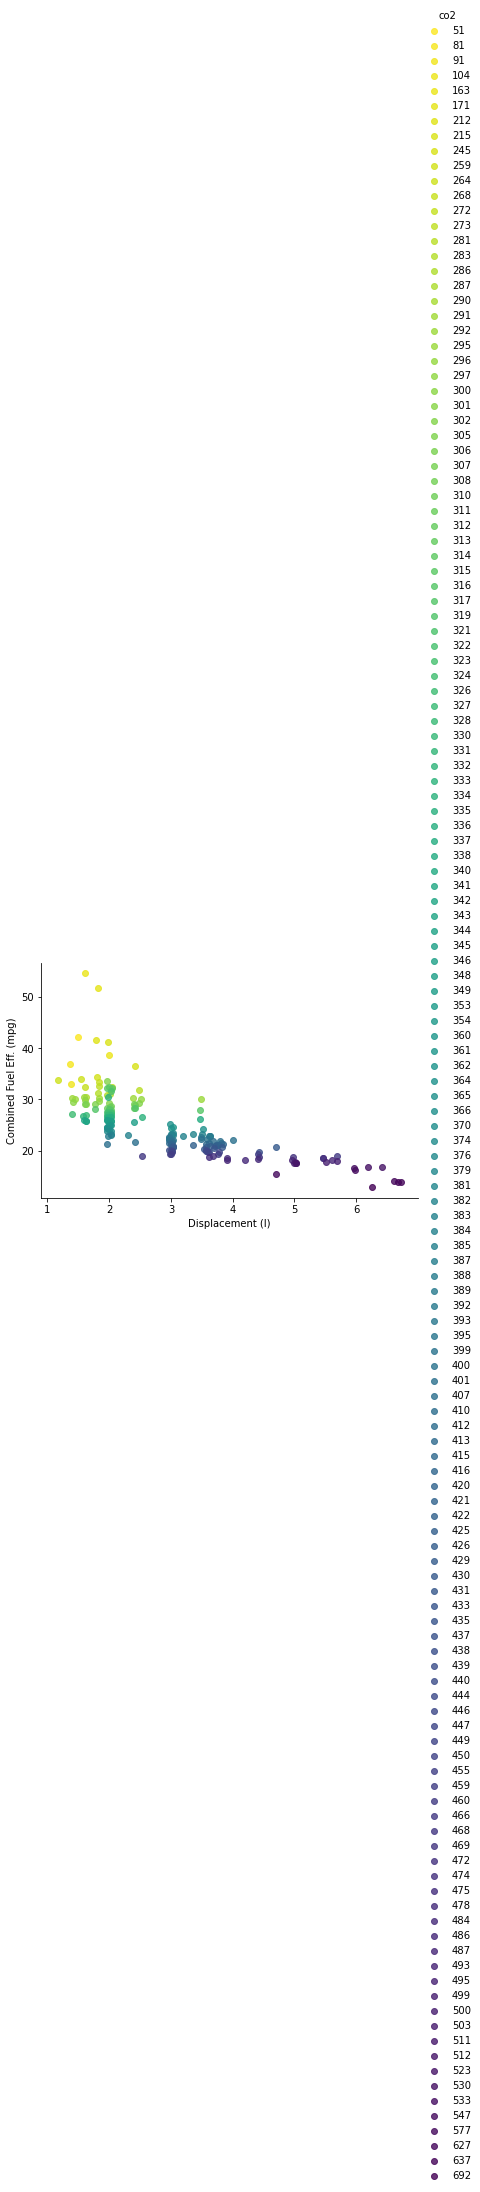

In [63]:
# what if we have numeric variable instead, co2 in this case
# we should not just set the variable in the hue parameter since
# FacetGrid only expects to facet across categorical variables

g = sb.FacetGrid(data=fuel_econ_subset, hue='co2', height=4, 
                 aspect=1.5, palette='viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend();  # automatically add a legend to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

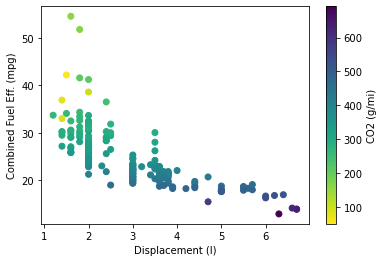

In [19]:
# adding another numeric variable as setting a "c" parameter (not "hue" or "color" parameter)
# different color palette as "cmap" parameter (not "palette" parameter)

plt.scatter(data=fuel_econ_subset, 
            x='displ', 
            y='comb', 
            c='co2',
            cmap='viridis_r') 

plt.colorbar(label='CO2 (g/mi)') # use colorbar to add a color bar to the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

<a id="2.2"></a>
### Color Palettes
[Table of contents](#0)

Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider: qualitative, sequential, and diverging.

**Qualitative** palettes are built for nominal-type data. This is the palette class taken by the default palette.

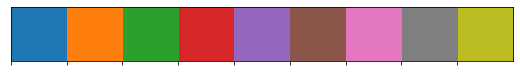

In [66]:
# Plot the values in a color palette as a horizontal array.
sb.palplot(sb.color_palette(n_colors=9))

In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. 

In a **sequential** palette, consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. 

The default sequential color map, `"viridis"`, takes the opposite approach, with dark colors indicating low values, and light values indicating high.

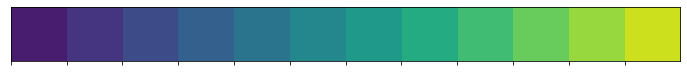

In [68]:
sb.palplot(sb.color_palette('viridis', 12))

Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is a meaningful <u>zero or center value</u> for the variable, you may want to consider using a **diverging** palette. 

In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

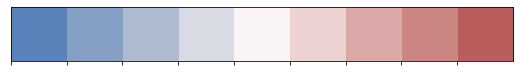

In [69]:
sb.palplot(sb.color_palette('vlag', 9))

<a id="2.3"></a>
### Selecting Color Palettes
[Table of contents](#0)

If you want to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from Matplotlib or Seaborn. 

[This part](https://matplotlib.org/stable/api/pyplot_summary.html) of the Matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes noted in the top few tables as built-in for Matplotlib ('viridis', etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. 

Seaborn also adds in a number of its own palettes:
- Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
- Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
- Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)
For all of these strings, appending `'_r'` reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

A color palette can be set in `FacetGrid` through the "palette" parameter, and in scatter through the `"cmap"` parameter.

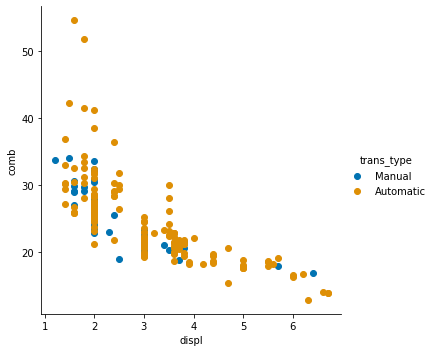

In [70]:
# Example
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'displ', 'comb')
g.add_legend();

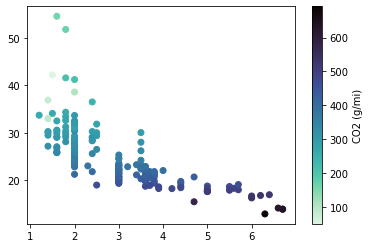

In [75]:
# Example
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2', cmap='mako_r',
            vmin=fuel_econ_subset['co2'].min(), vmax=fuel_econ_subset['co2'].max())
plt.colorbar(label='CO2 (g/mi)');


When using a diverging color palette, you will likely need to specify the `"vmin"` and `"vmax"` parameters in order to have the neutral point in the palette meet the center point in the scale as shown above. 

Alternatively, solutions that create a different normalization function like the one posted in [this Stack Overflow thread](https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib) can be used for finer control over the color map. 

Diverging color scales are common enough for the heatmap type that there is a `"center"` parameter for setting the central value. 

<a id="2.4"></a>
### Warnings on Color
[Table of contents](#0)

There are a couple of things to be aware of in general, when working with color. 

- First of all, try and consider color blindness when selecting color for your plots. 

    &nbsp;&nbsp;&nbsp;&nbsp;You don't want your visualization to shut out the 8% of the population   that have some kind of color vision deficiency. Fortunately, the built-in color palettes highlighted in the previous section should minimize these concerns. If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness simulator like [this one](http://www.color-blindness.com/coblis-color-blindness-simulator/).


- Secondly, you want to be aware of the effect of transparency and overlap on interpretability. 

  &nbsp;&nbsp;&nbsp;&nbsp;If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data.
  
  &nbsp;&nbsp;&nbsp;&nbsp;To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.

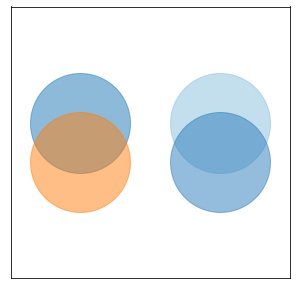

In [77]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5, s=1e4, color=sb.color_palette()[0], alpha=0.5)
plt.scatter(0,-0.5, s=1e4, color=sb.color_palette()[1], alpha=0.5)

# right: quantitative points
plt.scatter(1, 0.5 , s=1e4, color=sb.color_palette('Blues')[2], alpha=0.5)
plt.scatter(1, -0.5, s=1e4, color=sb.color_palette('Blues')[4], alpha=0.5)

# set axes for point overlap
plt.xlim(-0.5, 1.5)
plt.ylim(-3.5, 3.5)
plt.xticks([])
plt.yticks([]);

<a id="3"></a>
## Faceting in two directions
[Table of content](#0)

### Faceting for multivariate data
[Table of contents](#0)

Faceting can be extended to multivariate cases by having each facet be a bivariate plot instead. We can just change the mapping parameters, a scatter instead of histogram, and two axis variables instead of just one like this:

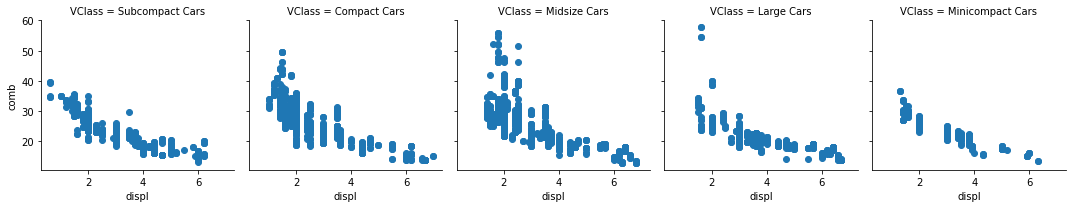

In [3]:
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.scatter, 'displ', 'comb');

We are not limited to adding one variable either. If we add a row `'trans_type'` argument to the `FacetGrid`, we separate each vehicle class by "Automatic" and "Manual" transmissions like this:

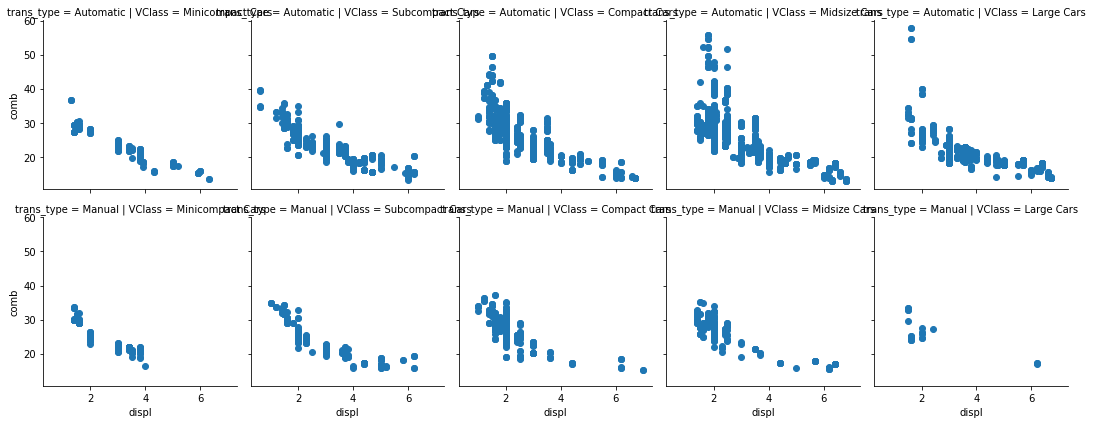

In [20]:
g = sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type') # note we specify row parameter
g.map(plt.scatter, 'displ', 'comb');

There is an unreadability issue of the labels. The simplest way to alleviate this unreadability is to set "margin_titles" parameter to True like this:

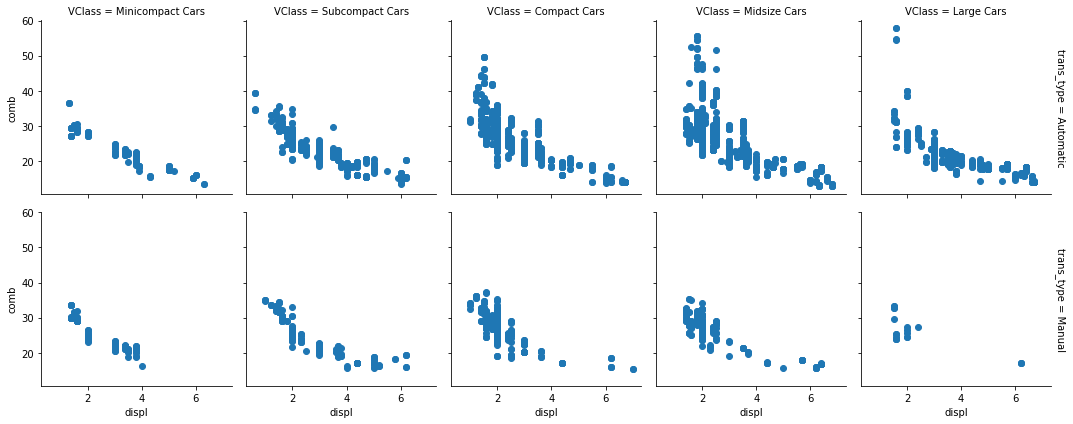

In [21]:
g = sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type', 
                 margin_titles=True)  # turn on the margin title 
g.map(plt.scatter, 'displ', 'comb');

When we have two categorical variables and one numeric variable, we can use `FacetGrid` this way:

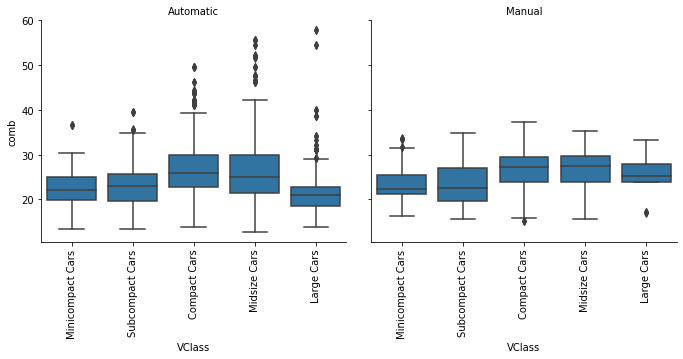

In [33]:
sedan_order=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
g = sb.FacetGrid(data=fuel_econ, 
                 col='trans_type', 
                 height=4, 
                 aspect=1.2)
g.map(sb.boxplot, 'VClass', 'comb', order=sedan_order); # note we specify one 
                                                        # of the categories on x axis
g.set_xticklabels(rotation=90)
g.set_titles('{col_name}');  # {col_name} is a template

<a id="4"></a>
## Other Adaptations of Bivariabe Plots
[Table of contents](#0)

You also saw one other way of expanding univariate plots into bivariate plots in the previous lesson: substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships. 

Let's extend this bivariate `pointplot` of fuel efficiency against the vehicle class into a multivariate plot by adding transmission type by adding the "hue" parameter. since the dots and bars are overlapping, we should add "dodge" parameter to be True to offset the two levels slightly.

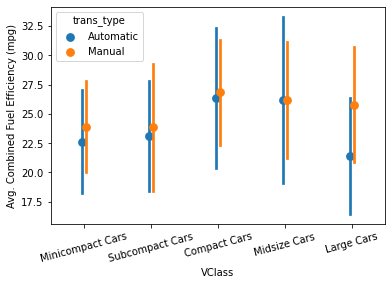

In [38]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', 
             hue='trans_type',
             ci='sd', 
             linestyles="", 
             dodge=True)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The `"hue"` parameter can be used in a similar fashion in the `boxplot`, and `violinplot` functions to add a categorical third variable to those plots in a clustered fashion. So alternatively, we can change the `pointplot` function into a `barplot` function to get an adapted clustered bar chart.

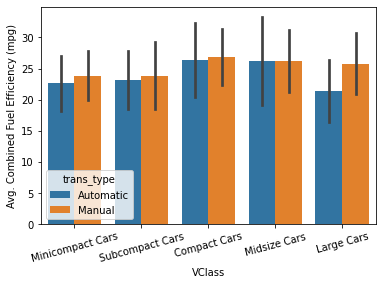

In [39]:
sb.barplot(data=fuel_econ, 
           x='VClass', 
           y='comb', 
           hue='trans_type',
           ci='sd')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')
plt.legend(loc=3, bbox_to_anchor=(1, 0));  # use "loc" and "bbox_to_anchor" 
                                           # for different legend location

Even further, we can take one more step back on the summarization levels and use the `boxplot` function to get a clustered box plot.

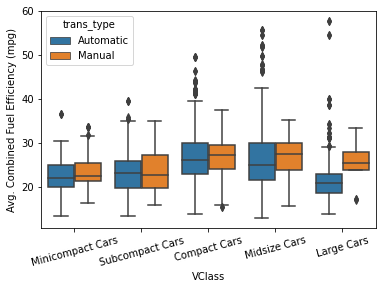

In [40]:
sb.boxplot(data=fuel_econ, 
           x='VClass', 
           y='comb', 
           hue='trans_type')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

### Three variables 2-d heat map 

We can also adapt heat map so that instead of color being based on count, color is based on the mean of a third variable. Let's change this heat map of fuel efficiency against engine size so 
that average co2 output is plotted instead. 

The low level of point overlap observed earlier means that the scatterplot with color or size encoding was sufficient for depicting the data. You'll be more likely to use the heat map if there is a lot of data to be aggregated.

If we want to depict the mean of a third variable in a **2-d histogram**, we need to change the weights of points in the `hist2d` function similar to how we changed the weights in the 1-d histogram (use `plt.hist` for bivariate plots using the "weights" parameter).

There is also a "weights" parameter in `hist2d` that says how much each data point is worth in the aggregation. By default, each point's weight is worth 1 so that the colors reflect the total counts. If we change it so that each point's weight is equal to its co2 emissions divided by the number of cars in its bin, then the sum within each bin will be the average co2 emissions.

Our first step is to figure out in which bin each point falls. We compute this using the pandas `cut` function. 

In [22]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

displ_bins = pd.cut(fuel_econ['displ'], bins_x, right=False, include_lowest=False)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right=False, include_lowest=False)

In [51]:
# bins are identified as intervals
displ_bins

0       [3.6, 3.9)
1       [1.8, 2.1)
2       [3.6, 3.9)
3       [3.6, 3.9)
4       [2.4, 2.7)
           ...    
3924    [1.8, 2.1)
3925    [1.8, 2.1)
3926    [1.8, 2.1)
3927    [3.3, 3.6)
3928    [3.3, 3.6)
Name: displ, Length: 3929, dtype: category
Categories (22, interval[float64]): [[0.6, 0.9) < [0.9, 1.2) < [1.2, 1.5) < [1.5, 1.8) ... [6.0, 6.3) < [6.3, 6.6) < [6.6, 6.9) < [6.9, 7.2)]

In [50]:
comb_bins

0       [18, 21)
1       [24, 27)
2       [18, 21)
3       [18, 21)
4       [27, 30)
          ...   
3924    [54, 57)
3925    [39, 42)
3926    [42, 45)
3927    [21, 24)
3928    [21, 24)
Name: comb, Length: 3929, dtype: category
Categories (16, interval[int64]): [[12, 15) < [15, 18) < [18, 21) < [21, 24) ... [48, 51) < [51, 54) < [54, 57) < [57, 60)]

The `'label=False'` argument is added so that the bins are identified numerically (counting from 0), and we apply `astype` to make indexing later easier.

In [37]:
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right=False, include_lowest=False,
                   labels=False).astype(int)   # bins are not identified as intervals now
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right=False, include_lowest=False,
                   labels=False).astype(int)

In [38]:
# bins are identified as counting numbers of the intervals starting from 0
displ_bins

0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int32

In [69]:
comb_bins

0        2
1        4
2        2
3        2
4        5
        ..
3924    14
3925     9
3926    10
3927     3
3928     3
Name: comb, Length: 3929, dtype: int32

Next, we count up the number of points that fall in each bin.

In [39]:
# count up number of vehicles in each intersection of bins
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points

displ  comb
0      7        3
       9        3
1      6        4
       7        8
2      5       42
               ..
19     1       20
       2       15
20     0       38
       1       13
21     1        2
Length: 91, dtype: int64

In [ ]:
# convert the multi-index Series to a data frame
n_points = n_points.reset_index()

In [41]:
n_points.head(10)

,displ,comb,count
0,0,7,3
1,0,9,3
2,1,6,4
3,1,7,8
4,2,5,42
5,2,6,62
6,2,7,31
7,2,8,15
8,2,9,7
9,2,10,4


In [42]:
# pivot the table to set the count as the values of the displ and the comb variables
# transform a data frame from long form to wide form
n_points = n_points.pivot(index='displ', columns='comb')
n_points

comb,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
displ,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,42.0,62.0,31.0,15.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,6.0,55.0,130.0,119.0,34.0,7.0,NaN,7.0,2.0,4.0,1.0,2.0,2.0
4,NaN,NaN,15.0,98.0,405.0,311.0,145.0,55.0,14.0,26.0,6.0,10.0,3.0,3.0,5.0,NaN
5,NaN,NaN,1.0,12.0,9.0,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,11.0,37.0,105.0,82.0,37.0,5.0,15.0,17.0,NaN,1.0,NaN,1.0,NaN,NaN
7,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,123.0,311.0,64.0,17.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# convert the data frame in an array form
n_points = n_points.to_numpy()

In [45]:
n_points

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.,   3.,   5.,  nan],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan,   1.,  nan,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan,  n

Now we can get our point weights using all of these values. We take the co2 Series and divide each element by the number of points in each bin using the cut bins vector for indexing into the right places.

In [46]:
# displ_bins as the row index
displ_bins.values

array([10,  4, 10, ...,  4,  9,  9])

In [47]:
# comb_bins as the column index
comb_bins.values

array([ 2,  4,  2, ..., 10,  3,  3])

In [48]:
# make sure the indexing is working correct
n_points[10, 2], n_points[4, 4], n_points[10, 2]

(173.0, 405.0, 173.0)

In [52]:
# indexing with two lists
n_points[[10, 4, 10],[2, 4, 2]]

array([173., 405., 173.])

In [49]:
# all the point counts
n_points[displ_bins, comb_bins]

array([173., 405., 173., ...,   6., 190., 190.])

In [50]:
# scaling co2 to generate co2 weights
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

In [51]:
co2_weights

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
          ...    
3924    15.600000
3925     8.346154
3926    35.333333
3927     2.036842
3928     2.194737
Name: co2, Length: 3929, dtype: float64

In [ ]:
# The steps above are for demonstration purposes
# We can instead put everything together to get the "n_points" in one line
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

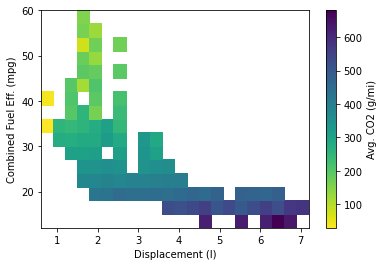

In [53]:
# Now we are ready to plot using the "weights" parameter
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', 
           cmin=0.5, cmap='viridis_r',
           bins=[bins_x, bins_y], 
           weights=co2_weights) # this is where the magic happens

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label='Avg. CO2 (g/mi)');

### Three variables 2-d bar chart

The code for the **2-d bar** chart doesn't actually change much. The actual `heatmap` call is still the same, only the aggregation of values changes. Instead of taking `size` after the `groupby` operation, we compute the `mean` across dataframe columns and isolate the column of interest, "co2" in this case.

In [64]:
# Copied from previous bivariate_visualization section
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size() # use size() here
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

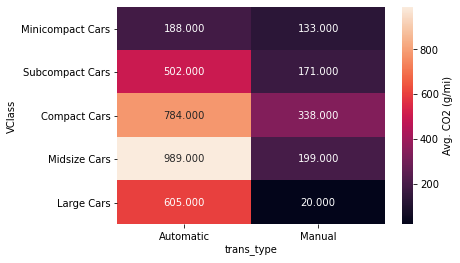

In [67]:
ct_means = fuel_econ.groupby(['VClass', 'trans_type']).mean()['co2'] # find the mean and isolate the co2

# get to the proper form in one line
ct_means = ct_counts.reset_index(name='co2_avg').pivot(index='VClass', columns='trans_type', values='co2_avg')
sb.heatmap(ct_means, 
           annot=True, 
           fmt='.3f', 
           cbar_kws={'label': 'Avg. CO2 (g/mi)'}); 

Note how the "cbar_kws" provides an additional argument to the colorbar component of the heat map call.

### Three variables Line plots

As a final example, a **line plot** can be adapted from previous code showing how to create frequency polygons for levels of a categorical variable. In this case as well, we create a custom function to send to a **FacetGrid** object's `map` function that computes the means in each bin, then plots them as lines via `errorbar`.

In [75]:
def mean_poly(x, y, bins=10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
        
    # a smart way to get the bin centers
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute the means in each bin
    data_bins = pd.cut(x, bins, right=False, include_lowest=True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x=bin_centers, y=means, **kwargs)

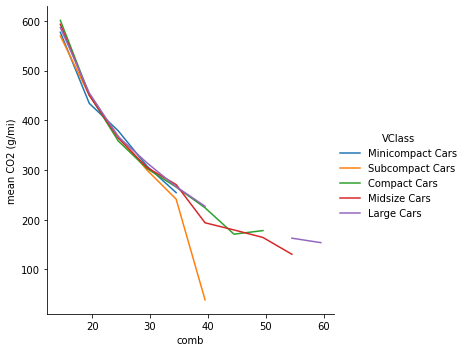

In [76]:
bin_edges = np.arange(12, 57.79+5, 5)
g = sb.FacetGrid(data=fuel_econ, hue='VClass', height=5)
g.map(mean_poly, "comb", 'co2', bins=bin_edges) # note co2 is specified as y variable here
g.add_legend();
g.set_ylabels('mean CO2 (g/mi)');

<a id="5"></a>
## Plot Matrices
[Table of contents](#0)

<a id="5.1"></a>
### Plot Matrices
[Table of contents](#0)

To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a **plot matrix**, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

Seaborn's `PairGrid` class facilitates the creation of this kind of plot matrix.

In [77]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


We are interested in the last 6 columns of battle statistics. We use `seaborn`'s `PairGrid` class for plotting matrix. If `vars` parameters not specified, all numeric variables in the data frame will be put into the plot.

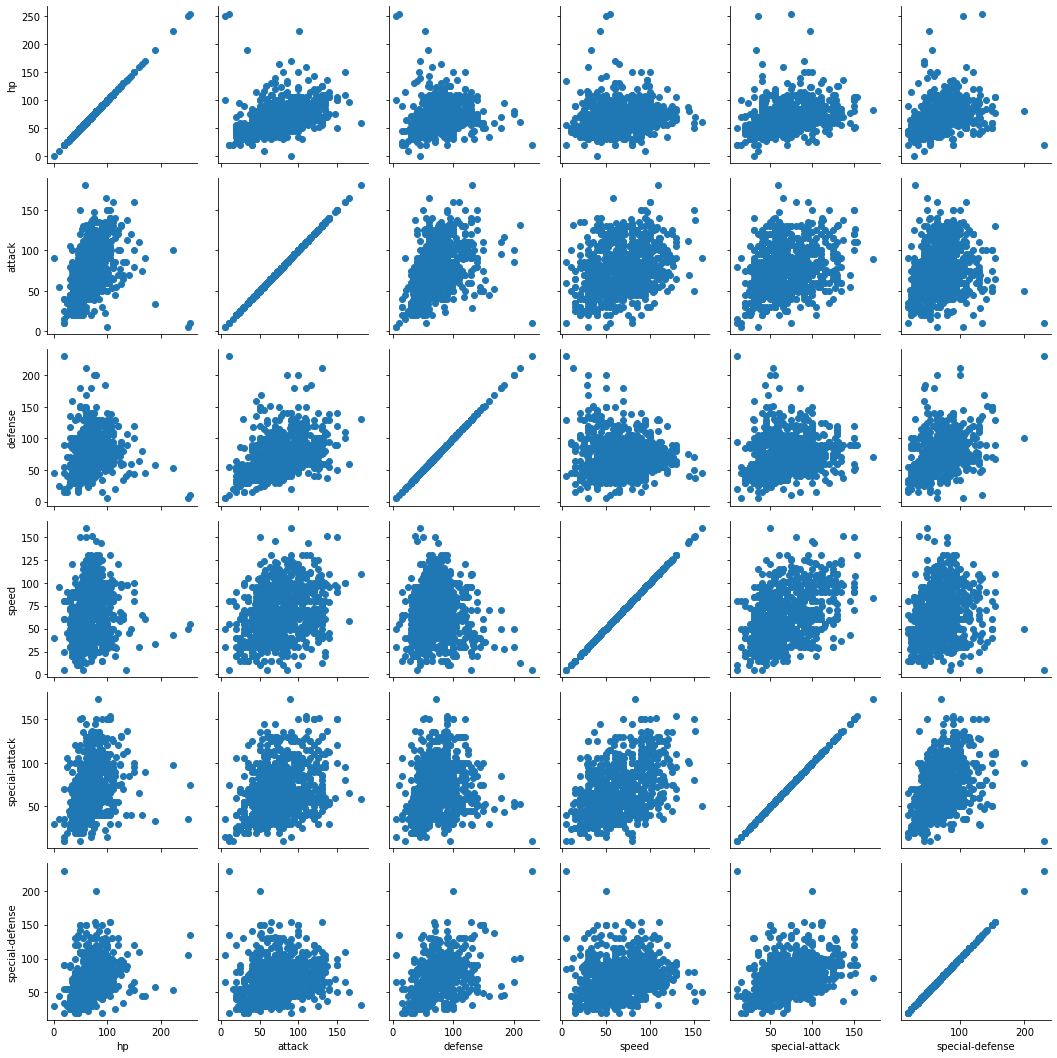

In [151]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']

# use seaborn's PairGrid class
g = sb.PairGrid(data=pokemon, vars=pkmn_stats)    # note use the "vars" parameter
g.map(plt.scatter);

We use `map_offdiag` function to draw scatter plots on off diagonal areas, and put histograms instead on diagonal axis by the `map_diag` function like this:

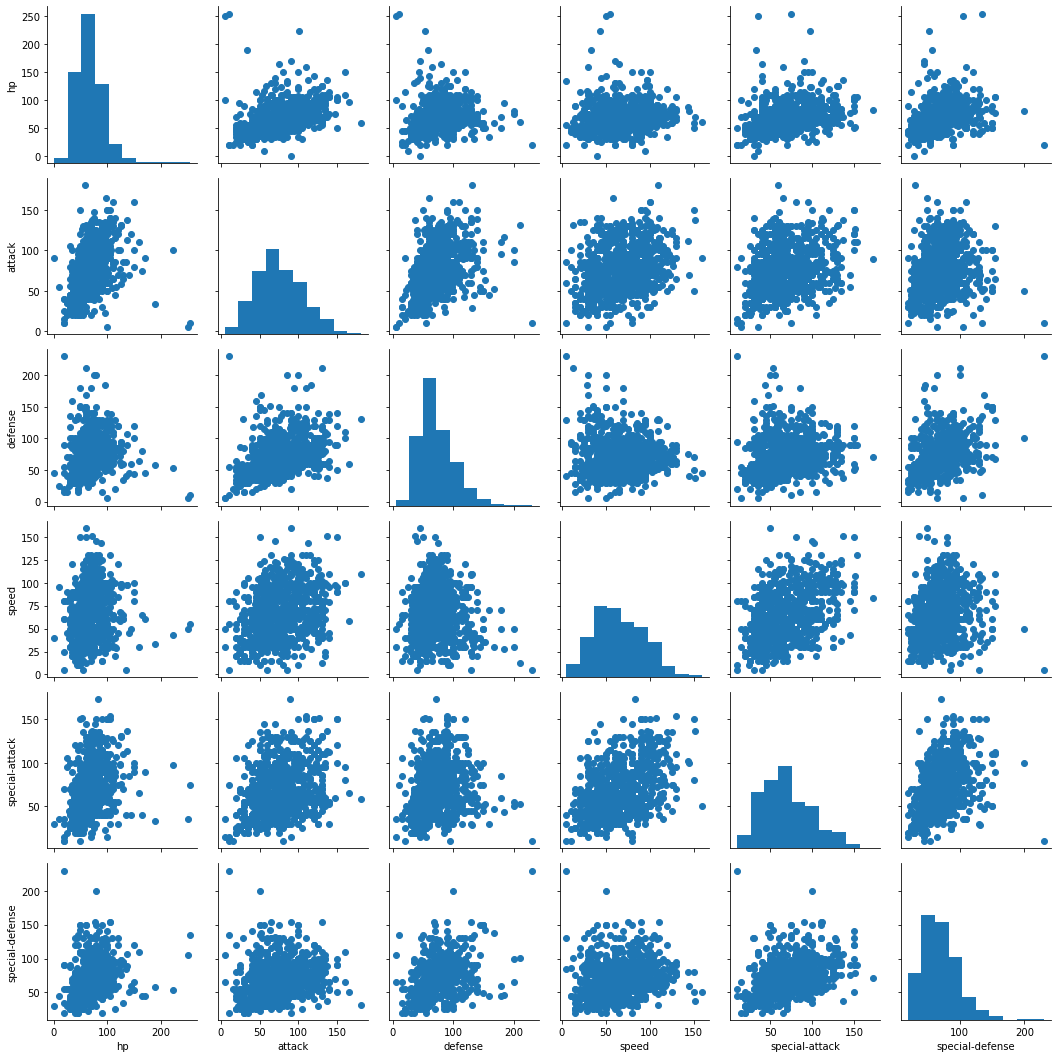

In [152]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data=pokemon, vars=pkmn_stats)

# use "map_offdiag" and "map_diag" functions
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

The seaborn's `pairplot` function can also be used to render this common use case in a single call.

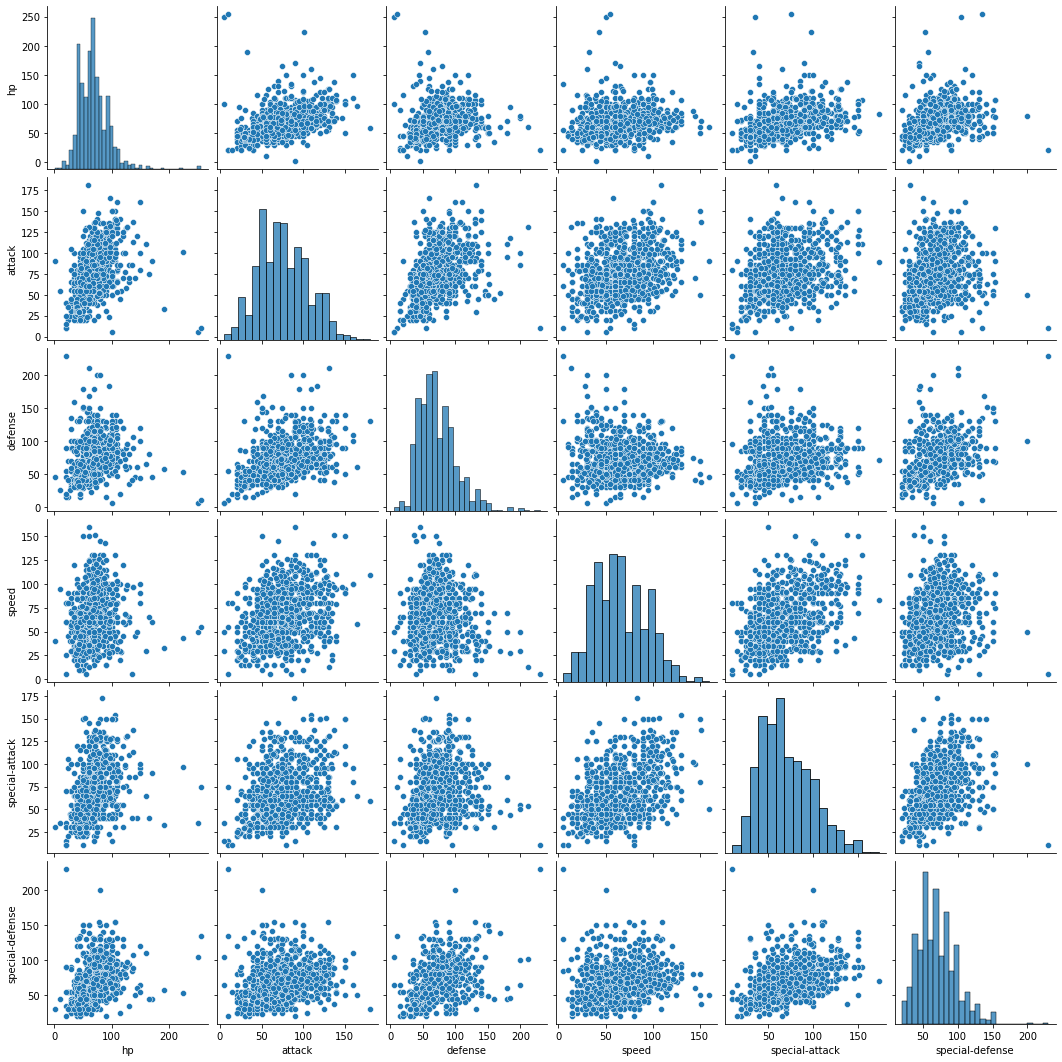

In [153]:
sb.pairplot(data=pokemon, vars=pkmn_stats);

For other relationships, the flexibility of **PairGrid** shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

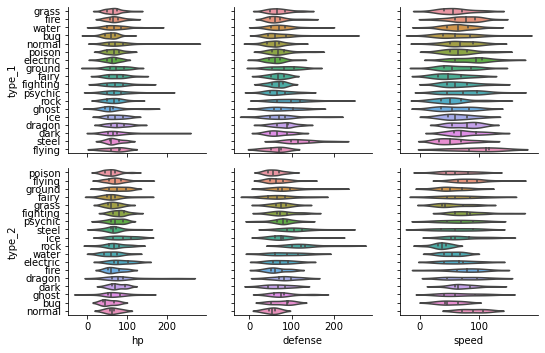

In [156]:
# This is for demonstration purposes
g = sb.PairGrid(data=pokemon, x_vars=['hp', 'defense', 'speed'],
                y_vars=['type_1','type_2'])  # note we use both "x_vars" and "y_vars" 
                                             # rather than "vars"
g.map(sb.violinplot, inner='quartile');

<a id="5.2"></a>
### Correlation Matrices
[Table of contents](#0)

Let's check this numerically by computing and plotting the correlations in a correlation heat map. The `corr` function returns a matrix of pairwise of correlations between our selected variables. Putting this into a `heatmap` function produces our desired visualization.

In [141]:
# the pd.DataFrame.corr() function
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


Instead of using the default sequential color map, a diverging color map is specified and its center is set to 0 (if we have some negative correlations). That way, we can use "hue" to tell if a correlation is positive or negative, and see its strength from the hue's intensity.

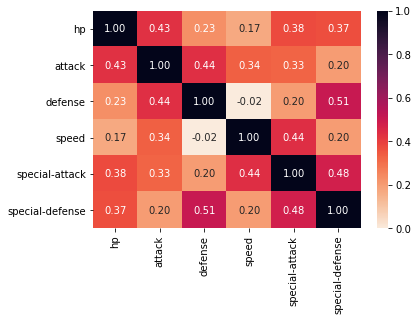

In [158]:
# specify data param to pokemon[pkmn_stats].corr() directly
# reverse the color palette, use 'rocket_r' or 'viridis_r'
# since there is only one correlation that is negative, 
# it is essentially 0, so we set "vmin=0"
sb.heatmap(data=pokemon[pkmn_stats].corr(), 
           cmap='rocket_r', 
           annot=True, 
           fmt='.2f', 
           vmin=0);

Don't forget that correlations are computed based on strength of linear relationship. Compare the correlation between numeric variables to the corresponding cell in the previous plot matrix as an example of how a correlation statistic might be misleading.

For example, the correlation heatmap supports the observations we made from the plot matrix. We seen that there are relatively high correlation values between hp and attack, attack and defense, and special attack and special defense. But it looks like there is a surprisingly high correlation between defense and special-defense. Looking back on the plot matrix, perhaps that outliers in the upper right is boosting the statistic. That point would be worth further investigation in a deeper dive.

<a id="6"></a>
## Feature Engineering
[Table of contents](#0)

This is not so much an additional technique for adding variables to your plot, but a reminder that feature engineering is a tool that you can leverage as you explore and learn about your data. As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

For example, if you have one variable that gives a count of crime incidents, and a second one that gives population totals, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.

Another way that you can perform feature engineering is to use the `cut` function to divide a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings. For example, we might facet plots by bins of a numeric variable, or use discrete color bins rather than a continuous color scale. This kind of discretization step might help in storytelling by clearing up noise, allowing the reader to concentrate on major trends in the data. Of course, the bins might also mislead if they're spaced improperly – check out [this PolicyViz post](https://policyviz.com/2017/11/02/choosing-map-bins/) if you'd like to see a deeper discussion in the context of map-based visualizations.

So feature engineering is an option when performing an investigation into your data. I am going to look an example of biases in Pokemon creatures statistics. More specifically, I want to know if a creature's offensive stats are biased towards physical or special-attack, and if their defensive stats are biased towards physical or special-defense. To do this, I will create new variables based on ratios.

In [5]:
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

If a creature has a value greater than one, then they favor the physical side; and if less than one, they favor the special side. 

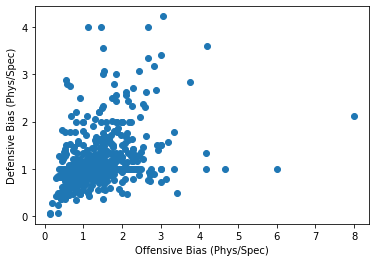

In [6]:
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio')
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');

Let's polish the things up by adding some transparency and changing the axis scales to log scales. That way a bias of 2 to 1 is evenly spaced from 
the even ratio of 1 in both the physical and special directions. And add some tick marks appropriate for a log scale. And finally I will set the axis limits to remove the extreme outliers. These particular limits also center the plot on 1 on both axes.


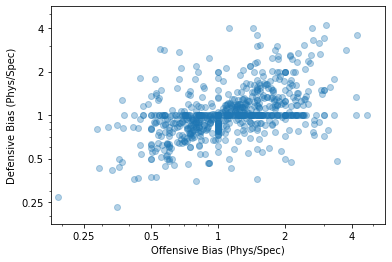

In [14]:
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha=1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');
plt.xscale('log');
plt.yscale('log');

tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc);
plt.xlim(2 ** -2.5, 2 ** 2.5)
plt.ylim(2 ** -2.5, 2 ** 2.5);

In the final plot, we see that most points seem to fall along a diagonal line. 

In the upper right-hand quadrant, we have Pokemon species that are physicall biased in both offense and defense; and in  the lower left-hand quadrant, they are special biased in both offense and defense. 

Interestingly, there appears to be a large number of Pokemon on the y equals 1 line showing no defensive bias. These Pokemon have a wide range of offensive biases. There appeared to be much fewer Pokemon on the x equals 1 line showing no offensive bias. 

Findings like these would be difficult to come by and summarize if we didn't build our engineered features.